# PyTorch Layer 이해하기

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# 이상하게 torch 를 import 하기 전에 
# 먼저  imshow() 해줘야 나중에 정상적으로 시각화 된다.

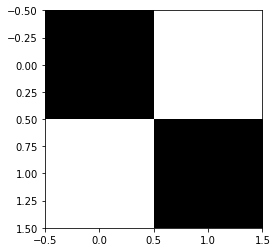

In [2]:
d = np.array([[0, 1], [1, 0]])
plt.imshow(d, 'gray')
plt.show()

In [3]:
import torch
from torchvision import datasets, transforms

In [4]:
save_dir = r'D:\DevRoot\DataSet\torch\dataset'

In [5]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST(
        save_dir    # 저장할 디렉토리
        , train=True   # 학습용
        , download = True  # 없으면 다운로드
        , transform = transforms.Compose([
                transforms.ToTensor()   # 데이터 다운받은뒤 Tensor 로 받아올거임.
                # 직전예제에선 normalize 했었다.  이번에는 '학습'이 주목적이 아니라서 생략.
        ]))
    
    , batch_size=1
    # 이번 단원의 목적은 이미지 '하나하나' 를 넣어서 '확인' 해보는 거라, batch_size 는 1 로만 줍니다.
)

In [6]:
image, label = next(iter(train_loader))

In [7]:
image.shape, label.shape

(torch.Size([1, 1, 28, 28]), torch.Size([1]))

In [ ]:
# (torch.Size([1, 1, 28, 28]), torch.Size([1]))
#              ↑
#      [batchsize, channel, height, width]

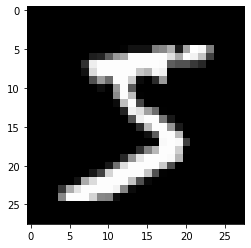

In [8]:
plt.imshow(image[0, 0, :, :], 'gray')
plt.show()

In [9]:
# 첫번재 이미지 는 '5'
# 이제 PyTorch 의 각 레이어들을 거치면서 이 이미지가 어덯게 변해가는지 보도록 하자.

# 각 Layer 들
- Network 쌓기 위한 준비

In [10]:
import torch
import torch.nn as nn  # nn 레이어 와
import torch.nn.functional as F  # F (레이어) 를 사용하게 된다

## Convolution
- in_channels: 받게 될 channel의 갯수
- out_channels: 보내고 싶은 channel의 갯수  
- kernel_size: 만들고 싶은 kernel(weights)의 사이즈

In [12]:
# PyTorch 의 Convolution
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [13]:
# ↑ TensorFlow 에서 봤을때와 좀 다르죠.

#  TensorFlow 에선 out channel 만 나왔습니다.  (얼마나 내보낼 것인지)
#  PyTorch 는 앞에서 몇개를 받을지도 지정해주어야 하는 것입니다. (in_channeles)
#  위 이미지의 채널은 1 이었습니다'  >> torch.Size([1, 1, 28, 28])
#  그리고 이것을 20개로 내보냅니다 (out_channels)

#  kernel_size = 5   TensorFlow 때는 3x3 이었는데
# PyTorch 공식예제 에선 5x5 로 되어 있어서 5로 주었습니다.

# stride = 1

In [14]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [15]:
layer_conv1 = nn.Conv2d(1, 20, 5, 1).to(torch.device(device))
layer_conv1

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

#### weight 시각화를 위해 slice 하고 numpy화

In [18]:
# weight 확인
weight = layer_conv1.weight
weight.shape

# torch.Size([20, 1, 5, 5])   <=  5 x 5 kernel 이 20개

torch.Size([20, 1, 5, 5])

In [20]:
# weight.numpy()  # detach() 없이 numpy() 로 꺼내려 하면 에러

- 여기서 weight는 '학습 가능한 상태'이기 때문에 바로 numpy로 뽑아낼 수 없음
    - '학습 가능?' 유연한, 말랑말랑한 tensor..
- detach() method는 그래프에서 잠깐 빼서 gradient에 영향을 받지 않게 함

In [22]:
weight = weight.detach().numpy()
weight

array([[[[-1.27742007e-01,  1.98388889e-01,  1.99273869e-01,
           1.63007244e-01,  7.27037340e-02],
         [ 3.73584032e-02, -1.33896410e-01, -1.53720781e-01,
           1.27926096e-01, -4.26620245e-02],
         [ 1.62565723e-01, -1.81941584e-01,  1.64659187e-01,
           1.41752973e-01, -1.78290531e-01],
         [ 1.39423415e-01,  1.75433412e-01,  1.67319044e-01,
           1.70543268e-01,  7.59668797e-02],
         [ 5.05405217e-02,  1.97658375e-01,  1.96595207e-01,
           1.37494251e-01,  9.27089900e-02]]],


       [[[ 1.38099000e-01,  1.94875017e-01,  3.22503299e-02,
          -1.81710914e-01,  8.91473740e-02],
         [ 1.00149706e-01, -1.80500343e-01,  9.43104774e-02,
           1.93830863e-01,  6.94935471e-02],
         [-3.59088182e-02, -3.96839380e-02,  5.26999980e-02,
           8.36485773e-02,  1.47889629e-01],
         [-1.34626687e-01, -8.73132497e-02, -1.93963766e-01,
          -7.51251727e-02,  5.98599762e-02],
         [-1.85375676e-01, -1.78033516e-01

In [24]:
weight.shape

(20, 1, 5, 5)

In [25]:
weight[0, 0, :, :]

array([[-0.127742  ,  0.19838889,  0.19927387,  0.16300724,  0.07270373],
       [ 0.0373584 , -0.13389641, -0.15372078,  0.1279261 , -0.04266202],
       [ 0.16256572, -0.18194158,  0.16465919,  0.14175297, -0.17829053],
       [ 0.13942342,  0.17543341,  0.16731904,  0.17054327,  0.07596688],
       [ 0.05054052,  0.19765837,  0.1965952 ,  0.13749425,  0.09270899]],
      dtype=float32)

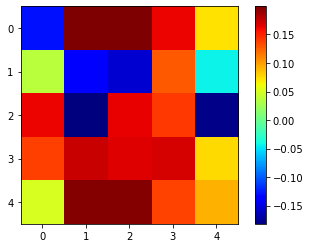

In [30]:
# 20개 중에서 첫번째것만 시각화 해봅시다
plt.imshow(weight[0, 0, :, :], 'jet')
plt.colorbar()
plt.show()

# ↓ 파란색 부분의 weight 가 낮은거고, 빨간색 부분은 높은 겁니다.

### Output 시각화
Convolution 을 통과한 후의 시각화

In [32]:
output_data = layer_conv1(image)
output_data.shape

torch.Size([1, 20, 24, 24])

In [34]:
output_data = output_data.data

In [35]:
# cpu() 로 컴파일 하고 numpy() 로 변환
output = output_data.cpu().numpy()

In [36]:
output  # numpy 데이터로 담겨 있다.

array([[[[ 0.0014033 ,  0.0014033 ,  0.0014033 , ...,  0.0014033 ,
           0.0014033 ,  0.0014033 ],
         [ 0.0014033 ,  0.0014033 ,  0.0014033 , ...,  0.34131327,
           0.14879987,  0.02657446],
         [ 0.0014033 ,  0.0014033 ,  0.0014033 , ...,  0.6425438 ,
           0.31208238,  0.08352631],
         ...,
         [ 0.00346415,  0.07804624,  0.30531958, ...,  0.0014033 ,
           0.0014033 ,  0.0014033 ],
         [-0.1028866 , -0.10107134,  0.07342426, ...,  0.0014033 ,
           0.0014033 ,  0.0014033 ],
         [-0.00566858,  0.11150095,  0.22138031, ...,  0.0014033 ,
           0.0014033 ,  0.0014033 ]],

        [[-0.17634247, -0.17634247, -0.17634247, ..., -0.17634247,
          -0.17634247, -0.17634247],
         [-0.17634247, -0.17634247, -0.17634247, ..., -0.6016253 ,
          -0.4445701 , -0.26866683],
         [-0.17634247, -0.17634247, -0.17634247, ..., -0.83820826,
          -0.5366718 , -0.2899175 ],
         ...,
         [-0.11251938, -0.03922389

In [37]:
# Convolution 레이어를 통과한 이미지
output.shape

(1, 20, 24, 24)

#### Input 으로 들어간 이미지 numpy 화

In [38]:
image_arr = image.numpy()
image_arr.shape

(1, 1, 28, 28)

In [ ]:
# 위 3개를 가지고 시각화 해보자
# image_arr : 입력
# output : 출력
# weight : 파라미터

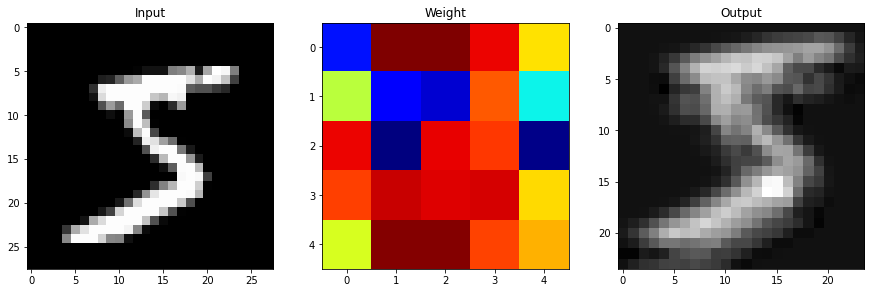

In [42]:
plt.figure(figsize=(15, 30))


plt.subplot(131)
plt.title("Input")
plt.imshow(np.squeeze(image_arr), 'gray')

plt.subplot(132)
plt.title("Weight")
plt.imshow(weight[0, 0, :, :], 'jet')

plt.subplot(133)
plt.title("Output")
plt.imshow(output[0, 0, :, :], 'gray')

plt.show()


## Pooling
input 을 먼저 앞에 두고, 뒤에 kernel 사이즈와 stride 를 순서대로 넣음

In [43]:
image.shape

torch.Size([1, 1, 28, 28])

In [ ]:

# nn 은, 그 안에 weight 가 있는 레이어들.
# functional 은 weight 가 없는 레이어들 (max pooling, activation 함수들..)

In [44]:
pool = F.max_pool2d(image, 2, 2)
pool.shape

torch.Size([1, 1, 14, 14])

In [45]:
# torch.Size([1, 1, 28, 28])
#     ↓
# torch.Size([1, 1, 14, 14])   # 반으로 줄어든거 확인할수 있다!

In [46]:
# MaxPool layer 는 weight가 없기 때문에 (즉 학습되는게 아니기에)  detach() 없이 곧바로 numpy() 가능

In [47]:
pool_arr = pool.numpy()
pool_arr

array([[[[0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.07058824, 0.07058824, 0.53333336, 0.6862745 ,
          1.        , 0.96862745, 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.19215687, 0.99215686,
          0.99215686, 0.99215686, 0.99215686, 0.99215686, 0.88235295,
          0.99215686, 0.7647059 , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.07058824, 0.99215686,
          0.99215686, 0.99215686, 0.7764706 , 0.96862745, 0.        ,
          0.        , 0.        , 0.        , 0.        ],
     

In [48]:
pool_arr.shape

(1, 1, 14, 14)

In [49]:
image_arr.shape

(1, 1, 28, 28)

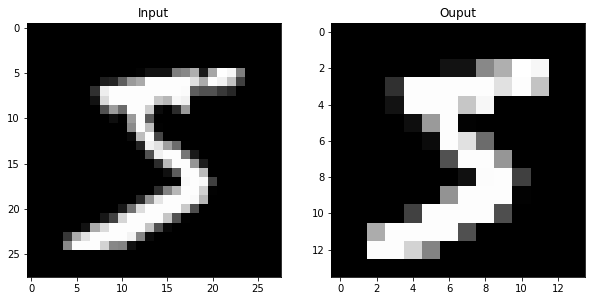

In [50]:
# 이를 비교하는 시각화 
plt.figure(figsize=(10, 15))

plt.subplot(121)
plt.title("Input")
plt.imshow(np.squeeze(image_arr), 'gray')

plt.subplot(122)
plt.title("Ouput")
plt.imshow(np.squeeze(pool_arr), 'gray')

plt.show()

In [51]:
# ↑ 이미지가 '반' 으로 줄어들면서 강하게 자극 받는 output 을 확인할수 있다

## nn.Linear()
- nn.Linear는 2d가 아닌 1d만 들어가기 때문에 .view() 1D로 펼쳐줘야함
- TensorFlow 처럼 Flatten 이라는 레이어가 따로 있는게 아니라서  
    - 우선, reshape 나 view 를 사용해서 펼쳐 준뒤, Linear() 에 넣어야 합니다

In [52]:
image.shape

torch.Size([1, 1, 28, 28])

In [54]:
flatten = image.view(1, 28 * 28)  # batch size 는 유지해줌
flatten.shape

torch.Size([1, 784])

In [55]:
# Linear 에 넣어 봅니다.
lin = nn.Linear(in_features=784, out_features=10)(flatten)  # flatten 의 784 개를 받아서 10개로 내보냄.
lin.shape

torch.Size([1, 10])

In [56]:
lin

tensor([[-0.2796,  0.2318,  0.0938, -0.1894, -0.0685, -0.1086, -0.0106,  0.2879,
          0.0518,  0.0269]], grad_fn=<AddmmBackward>)

In [57]:
# Linear 에는 weight 가 있기 때문에  numpy 객체 확인하려면 우선 detach 해주어야 한다

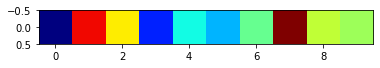

In [58]:
# 시각화
plt.imshow(lin.detach().numpy(), 'jet')
plt.show()

## F.softmax()

In [59]:
lin.shape

torch.Size([1, 10])

In [60]:
# 이번에는 detach() 말고 no_grad 를 사용하여 꺼내봅니다.

In [61]:
with torch.no_grad():
    flatten = image.view(1, 28 * 28)
    lin = nn.Linear(784, 10)(flatten)
    softmax = F.softmax(lin, dim=1)  #torch.Size([1, 10]) 중 뒤에 있는 10개를 softmax 할것이다. dim=1 
    
    # no_grad() 가 아니면 softmax() 값은 볼수 없다.

In [62]:
softmax

tensor([[0.1511, 0.1079, 0.0842, 0.1115, 0.0615, 0.1004, 0.1151, 0.0844, 0.0890,
         0.0950]])

In [65]:
np.sum(softmax.numpy())  # 합하면 1

0.9999999

In [67]:
np.argmax(softmax)

tensor(0)

# Layer 쌓기

In [77]:
class Net(nn.Module):
    
    # 생성자 에는 '학습(train)' 이 가능한 것, 즉 weight 가 들어있는 레이어
    # 위 예제코드에선 Conv 와 Linear 가 그런 레이어었다.    
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1) # (in-channel, out-channel, kernel-size, stride)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4 * 4 * 50, 500)  # fc (fully connected)
        self.fc2 = nn.Linear(500, 10)  # 최종적으로 10개의 class
    
 
    # 생성자에서 '학습' 이 가능한 레이어들을 만들어 놓았으니
    # 이를 적용해준다   
    def forward(self, x):
        # 1. Feature Extraction 
        x = F.relu(self.conv1(x))  # Convolution 은 relu 를 거쳐 activate 시킨다
        x = F.max_pool2d(x, 2, 2)    # (입력, kernel, stride)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        
        # 2. Fully Connected (Classification)
    
        # print(x.shape)  # torch.Size([1, 50, 4, 4])  batch size 와 관계없이 50 x 4 x 4 는 고정적이 된다.
    
        # 우선 펼쳐주어야 한다.
        x = x.view(-1, 4 * 4 * 50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        # 마지막으로 softmax 로
        return F.log_softmax(x, dim=1)

#### Image 를 Model 에 넣어서 결과 확인

In [78]:
model = Net()  # 모델 생성!

In [79]:
result = model.forward(image)
result

tensor([[-2.3213, -2.3014, -2.3332, -2.2448, -2.3009, -2.2671, -2.3502, -2.3877,
         -2.3318, -2.2008]], grad_fn=<LogSoftmaxBackward>)

In [80]:
# 레이어 하나하나씩 불러올수도 있다.
model.conv1

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [81]:
# 그 레이어에 데이터를 넣어볼수도 있다
model.conv1(image)

tensor([[[[ 0.0490,  0.0490,  0.0490,  ...,  0.0490,  0.0490,  0.0490],
          [ 0.0490,  0.0490,  0.0490,  ...,  0.2532,  0.1753,  0.0705],
          [ 0.0490,  0.0490,  0.0490,  ...,  0.2998,  0.2721,  0.1266],
          ...,
          [-0.0005, -0.1605, -0.3332,  ...,  0.0490,  0.0490,  0.0490],
          [-0.0250, -0.0953, -0.0492,  ...,  0.0490,  0.0490,  0.0490],
          [ 0.0764,  0.1578,  0.2356,  ...,  0.0490,  0.0490,  0.0490]],

         [[ 0.0533,  0.0533,  0.0533,  ...,  0.0533,  0.0533,  0.0533],
          [ 0.0533,  0.0533,  0.0533,  ...,  0.0504,  0.0345,  0.0417],
          [ 0.0533,  0.0533,  0.0533,  ...,  0.1099,  0.1042,  0.0537],
          ...,
          [ 0.1681,  0.2176,  0.1487,  ...,  0.0533,  0.0533,  0.0533],
          [ 0.1099,  0.1559,  0.1452,  ...,  0.0533,  0.0533,  0.0533],
          [ 0.0214, -0.1346, -0.2270,  ...,  0.0533,  0.0533,  0.0533]],

         [[-0.1687, -0.1687, -0.1687,  ..., -0.1687, -0.1687, -0.1687],
          [-0.1687, -0.1687, -